In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
def importData(filename):
    # Read Data
    data = pd.read_csv(filename,delimiter=';')
    print(f"shape awal                    : {data.shape}, (#observasi, #fitur)")

    # Drop duplicate
    data = data.drop_duplicates()
    print(f"shape setelah drop duplikat   : {data.shape}, (#observasi, #fitur)")

    return data

In [46]:
filename = "data/bank-additional-full.csv"
data = importData(filename = filename)

data.head()

shape awal                    : (41188, 21), (#observasi, #fitur)
shape setelah drop duplikat   : (41176, 21), (#observasi, #fitur)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
#split input output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [48]:
X, y = split_input_output(data = data,
                          target_column = "y")

In [49]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 123)

In [50]:
y_train.value_counts(normalize=True)

no     0.887341
yes    0.112659
Name: y, dtype: float64

In [51]:
y_test.value_counts(normalize=True)

no     0.887324
yes    0.112676
Name: y, dtype: float64

In [52]:
def handlingOutput(y_train, y_test, pos_value):
    y_train = y_train.apply(lambda x: 1 if x == pos_value else 0)
    y_test = y_test.apply(lambda x: 1 if x == pos_value else 0)
    
    return y_train, y_test

In [53]:
y_train, y_test = handlingOutput(y_train = y_train, 
                                 y_test = y_test, 
                                 pos_value = "yes")

In [11]:
y_train.value_counts(normalize=True)

0    0.887341
1    0.112659
Name: y, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

0    0.887324
1    0.112676
Name: y, dtype: float64

In [54]:
def convertPdaysGroup(df):
    bins = [0, 7, 14, 30]
    labels = ['1w', '2w', '>2w']
    df['pdays_group'] = pd.cut(df['pdays'], bins=bins, labels=labels, include_lowest=False)
    # change the dtype as object
    df['pdays_group'] = df['pdays_group'].astype('O')

    # fillna as Not contacted
    df['pdays_group'].fillna('Not contacted', inplace=True)
    df['pdays_group'].value_counts()
    df.drop(columns=['pdays'], axis=1, inplace=True)
    
    return df

X_train = convertPdaysGroup(X_train)
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_group
3369,30,blue-collar,single,high.school,no,yes,no,telephone,may,thu,399,1,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Not contacted
11480,34,admin.,divorced,basic.9y,no,yes,no,telephone,jun,fri,45,4,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,Not contacted
23021,56,admin.,divorced,university.degree,no,yes,no,cellular,aug,tue,479,4,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,Not contacted
28565,41,services,married,high.school,no,yes,yes,cellular,apr,wed,301,1,1,failure,-1.8,93.075,-47.1,1.415,5099.1,Not contacted
2635,31,services,married,basic.9y,no,no,no,telephone,may,tue,945,2,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Not contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38071,70,retired,married,basic.4y,no,no,no,cellular,sep,tue,150,1,2,success,-3.4,92.379,-29.8,0.770,5017.5,1w
33468,28,blue-collar,single,basic.9y,no,yes,yes,cellular,may,tue,637,3,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,Not contacted
13610,32,technician,single,university.degree,no,yes,no,cellular,jul,thu,100,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,Not contacted
3919,29,technician,married,professional.course,no,yes,no,telephone,may,mon,35,1,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,Not contacted


In [55]:
def convertAgeGroup(df): 
    bins = [16, 30, 40, 50, 60, 100]
    labels = ['<30', '31-40', '41-50', '51-60', '>60']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
    df.drop(columns=['age'], axis=1, inplace=True)
    return df

In [56]:
X_train = convertAgeGroup(X_train)
X_train['age_group'].value_counts()

31-40    13120
41-50     8160
<30       5887
51-60     5039
>60        734
Name: age_group, dtype: int64

In [16]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [57]:
categorical_col = ["job","marital","education","default","housing","loan","contact", "month", "day_of_week", "poutcome", "pdays_group","age_group"]
numerical_col = ["duration","campaign","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

In [58]:
def splitNumCat(data, num_col, cat_col):
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat

In [59]:
X_train_num, X_train_cat = splitNumCat(data = X_train,
                                       num_col = numerical_col,
                                       cat_col = categorical_col)

In [60]:
X_train_num.head()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3369,399,1,0,1.1,93.994,-36.4,4.860,5191.0
11480,45,4,0,1.4,94.465,-41.8,4.959,5228.1
23021,479,4,0,1.4,93.444,-36.1,4.965,5228.1
28565,301,1,1,-1.8,93.075,-47.1,1.415,5099.1
2635,945,2,0,1.1,93.994,-36.4,4.856,5191.0


In [61]:
# Buat imputer untuk jaga-jaga apabila di data test ada yang kosong
from sklearn.impute import SimpleImputer

def imputerNum(data, imputer = None):
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [62]:
X_train_num_imputed, imputer_num = imputerNum(data = X_train_num)

In [63]:
def imputerCat(data, imputer = None):
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "constant",
                                fill_value = "UNKNOWN")
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [64]:
from sklearn.preprocessing import OneHotEncoder

def encoderCat(data, encoder_col = None, encoder = None):
    if encoder == None:
        # Buat objek
        encoder = OneHotEncoder(handle_unknown = "ignore",
                                drop = "if_binary")
        encoder.fit(data)
        encoder_col = encoder.get_feature_names_out(data.columns)

    # Transform data
    data_encoded = encoder.transform(data).toarray()
    data_encoded = pd.DataFrame(data_encoded,
                                index = data.index,
                                columns = encoder_col)
    
    return data_encoded, encoder_col, encoder


In [65]:
X_train_cat_imputed, imputer_cat = imputerCat(data = X_train_cat)

In [66]:
X_train_cat_imputed.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,pdays_group,age_group
3369,blue-collar,single,high.school,no,yes,no,telephone,may,thu,nonexistent,Not contacted,<30
11480,admin.,divorced,basic.9y,no,yes,no,telephone,jun,fri,nonexistent,Not contacted,31-40
23021,admin.,divorced,university.degree,no,yes,no,cellular,aug,tue,nonexistent,Not contacted,51-60
28565,services,married,high.school,no,yes,yes,cellular,apr,wed,failure,Not contacted,41-50
2635,services,married,basic.9y,no,no,no,telephone,may,tue,nonexistent,Not contacted,31-40


In [67]:
X_train_cat_encoded, encoder_col, encoder_OHE = encoderCat(data = X_train_cat_imputed)

In [68]:
X_train_cat_encoded

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,pdays_group_1w,pdays_group_2w,pdays_group_>2w,pdays_group_Not contacted,age_group_31-40,age_group_41-50,age_group_51-60,age_group_<30,age_group_>60
3369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11480,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
23021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
28565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38071,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [69]:
X_train_concat = pd.concat([X_train_num_imputed,
                            X_train_cat_encoded],
                           axis = 1)
X_train_concat.head()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,poutcome_success,pdays_group_1w,pdays_group_2w,pdays_group_>2w,pdays_group_Not contacted,age_group_31-40,age_group_41-50,age_group_51-60,age_group_<30,age_group_>60
3369,399.0,1.0,0.0,1.1,93.994,-36.4,4.860,5191.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11480,45.0,4.0,0.0,1.4,94.465,-41.8,4.959,5228.1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
23021,479.0,4.0,0.0,1.4,93.444,-36.1,4.965,5228.1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
28565,301.0,1.0,1.0,-1.8,93.075,-47.1,1.415,5099.1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2635,945.0,2.0,0.0,1.1,93.994,-36.4,4.856,5191.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [70]:
from imblearn.over_sampling import SMOTE

In [72]:
y_train.value_counts()

0    29229
1     3711
Name: y, dtype: int64

In [73]:
sm = SMOTE(sampling_strategy = 'not majority', k_neighbors = 50, random_state = 123)

X_train_smote, y_train = sm.fit_resample(X_train_concat, y_train)

In [27]:
smt = SMOTE(sampling_strategy = "minority",
           random_state = 123)

X_train_smote, y_train = smt.fit_resample(X_train_concat, y_train)

In [74]:
y_train.value_counts()

0    29229
1    29229
Name: y, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
def standardizeData(data, scaler = None):
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler

In [77]:
X_train_clean, scaler = standardizeData(data = X_train_smote)
X_train_clean.head()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,poutcome_success,pdays_group_1w,pdays_group_2w,pdays_group_>2w,pdays_group_Not contacted,age_group_31-40,age_group_41-50,age_group_51-60,age_group_<30,age_group_>60
0,0.035716,-0.591842,-0.487257,0.919762,0.842803,0.740703,0.996110,0.628723,-0.660505,2.208401,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,-0.831975,-0.567175,-0.454204,2.145009,-0.265275
1,-0.965261,0.728977,-0.487257,1.094948,1.615969,-0.309178,1.048538,1.056442,1.783943,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,1.394762,-0.567175,-0.454204,-0.553795,-0.265275
2,0.261925,0.728977,-0.487257,1.094948,-0.060043,0.799030,1.051715,1.056442,1.783943,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,-0.831975,-0.567175,2.576840,-0.553795,-0.265275
3,-0.241391,-0.591842,1.079125,-0.773699,-0.665772,-1.339616,-0.828287,-0.430774,-0.660505,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,-0.831975,2.015531,-0.454204,-0.553795,-0.265275
4,1.579595,-0.151569,-0.487257,0.919762,0.842803,0.740703,0.993991,0.628723,-0.660505,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,1.394762,-0.567175,-0.454204,-0.553795,-0.265275


In [78]:
def transformTestData(data, num_col, cat_col, encoder_col,
                      imputer_num, imputer_cat, encoder_cat,
                      scaler):
    
    data_conv_pdays = convertPdaysGroup(df=data)
    
    data_conv_age = convertAgeGroup(df=data_conv_pdays)
    
    
    # 1. Split num-cat
    data_num, data_cat = splitNumCat(data = data_conv_age,
                                     num_col = num_col,
                                     cat_col = cat_col)
    
    # 2. Handling num
    data_num_imputed, _ = imputerNum(data = data_num,
                                     imputer = imputer_num)
    
    # 3. Handling cat
    data_cat_imputed, _ = imputerCat(data = data_cat,
                                     imputer = imputer_cat)
    data_cat_encoded, _, _ = encoderCat(data = data_cat_imputed,
                                        encoder_col = encoder_col,
                                        encoder = encoder_cat)
    
    # 4. Concat data
    data_concat = pd.concat([data_num_imputed, data_cat_encoded],
                            axis = 1)
    
    # 5. Scale data
    data_clean, _ = standardizeData(data = data_concat,
                                    scaler = scaler)
    
    return data_clean

In [79]:
X_test_clean = transformTestData(data = X_test,
                                 num_col = numerical_col, 
                                 cat_col = categorical_col,
                                 encoder_col = encoder_col,
                                 imputer_num = imputer_num,
                                 imputer_cat = imputer_cat,
                                 encoder_cat = encoder_OHE,
                                 scaler = scaler)

X_test_clean.head()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,poutcome_success,pdays_group_1w,pdays_group_2w,pdays_group_>2w,pdays_group_Not contacted,age_group_31-40,age_group_41-50,age_group_51-60,age_group_<30,age_group_>60
4317,-0.566567,-0.591842,-0.487257,0.919762,0.842803,0.740703,0.993991,0.628723,-0.660505,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,-0.831975,-0.567175,2.576840,-0.553795,-0.265275
39179,-0.379944,0.288704,1.079125,-0.773699,-0.183159,1.051779,-1.231826,-1.472977,-0.660505,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,-0.831975,-0.567175,-0.454204,2.145009,-0.265275
7641,-0.651395,1.169251,-0.487257,0.919762,0.842803,0.740703,0.998228,0.628723,-0.660505,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,-0.831975,2.015531,-0.454204,-0.553795,-0.265275
23175,-0.241391,3.370617,-0.487257,1.094948,-0.060043,0.799030,1.051715,1.056442,-0.660505,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,1.394762,-0.567175,-0.454204,-0.553795,-0.265275
22036,-0.611809,0.288704,-0.487257,1.094948,-0.060043,0.799030,1.051186,1.056442,-0.660505,-0.508188,...,-0.373752,-0.343104,-0.159796,-0.075757,0.387096,-0.831975,2.015531,-0.454204,-0.553795,-0.265275


In [80]:
X_test_clean.columns

Index(['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',


In [81]:
X_train_clean.columns

Index(['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',


In [82]:
# Import library
from sklearn.tree import DecisionTreeClassifier

In [33]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until al

In [83]:
# Buat objek
dt = DecisionTreeClassifier(random_state = 123)

In [84]:
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"criterion": ["gini", "entropy"],
                 "max_depth": [5,10,20],
                }

dt_cv = GridSearchCV(estimator = dt,
                         param_grid = search_params,
                         cv = 5)

In [85]:
# Lakukan Fitting Data
dt_cv.fit(X = X_train_clean,
              y = y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20]})

In [86]:
dt_cv.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [91]:
# Buat best model
dt_new = DecisionTreeClassifier(criterion = dt_cv.best_params_["criterion"],
                            random_state = 123)

# Fit model
dt_new.fit(X_train_clean, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

In [92]:
y_pred_train_proba = dt_new.predict_proba(X_train_clean)
y_pred_train_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [93]:
y_pred_train = dt_new.predict(X_train_clean)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["no", "yes"]))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29229
         yes       1.00      1.00      1.00     29229

    accuracy                           1.00     58458
   macro avg       1.00      1.00      1.00     58458
weighted avg       1.00      1.00      1.00     58458



In [96]:
y_pred_train_proba = dt_new.predict_proba(X_test_clean)
y_pred_train_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [97]:
y_pred_test = dt_new.predict(X_test_clean)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["no", "yes"]))

              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7308
         yes       0.49      0.51      0.50       928

    accuracy                           0.89      8236
   macro avg       0.71      0.72      0.72      8236
weighted avg       0.89      0.89      0.89      8236



# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier(criterion="entropy",
                            max_features="sqrt",
                            random_state=123)

In [102]:
params = {"n_estimators": [500,520,540,560,580,600],
          "max_features": ["sqrt", "log2"],
          "max_depth" : [10,20,30],
          "criterion" : ['entropy','gini'],
        }

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
rfc_cv = GridSearchCV(estimator = rfc,
                          param_grid = params,
                          cv = 5)

In [105]:
rfc_cv.fit(X = X_train_clean,
              y = y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features='sqrt',
                                              random_state=123),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [500, 520, 540, 560, 580, 600]})

In [106]:
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500}

In [107]:
# Buat best model
rfc_new = RandomForestClassifier(max_features = rfc_cv.best_params_["max_features"],
                                 n_estimators = rfc_cv.best_params_["n_estimators"],
                                 criterion = rfc_cv.best_params_["criterion"],
                                 max_depth = rfc_cv.best_params_["max_depth"],
                                 random_state = 123)

# Fit model
rfc_new.fit(X_train_clean, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=500,
                       random_state=123)

In [108]:
y_pred_train_proba = rfc_new.predict_proba(X_train_clean)

In [109]:
y_pred_train = rfc_new.predict(X_train_clean)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["no", "yes"]))

              precision    recall  f1-score   support

          no       0.95      0.96      0.96     29229
         yes       0.96      0.95      0.96     29229

    accuracy                           0.96     58458
   macro avg       0.96      0.96      0.96     58458
weighted avg       0.96      0.96      0.96     58458



In [111]:
y_pred_test = rfc_new.predict(X_test_clean)
y_pred_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7308
           1       0.60      0.52      0.56       928

    accuracy                           0.91      8236
   macro avg       0.77      0.74      0.75      8236
weighted avg       0.90      0.91      0.90      8236



In [113]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[6982,  326],
       [ 446,  482]], dtype=int64)

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [115]:
y_pred_test_proba = rfc_new.predict_proba(X_test_clean)

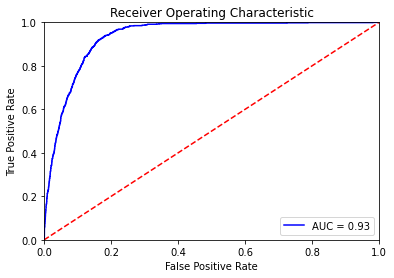

In [124]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_test_proba[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()